In [1]:
!pip install tensorflow==2.0

     |████████████████████████████████| 86.3MB 62kB/s 
     |████████████████████████████████| 3.8MB 46.7MB/s 
     |████████████████████████████████| 450kB 24.9MB/s 
  Found existing installation: tensorboard 1.15.0
    Uninstalling tensorboard-1.15.0:
      Successfully uninstalled tensorboard-1.15.0
  Found existing installation: tensorflow-estimator 1.15.1
    Uninstalling tensorflow-estimator-1.15.1:
      Successfully uninstalled tensorflow-estimator-1.15.1
  Found existing installation: tensorflow 1.15.0
    Uninstalling tensorflow-1.15.0:
      Successfully uninstalled tensorflow-1.15.0


In [0]:
import pandas as pd
import numpy as np
import featuretools as ft
import warnings
warnings.filterwarnings('ignore')

In [0]:
data=pd.read_csv('Churn_Modelling.csv')

In [5]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
RowNumber          10000 non-null int64
CustomerId         10000 non-null int64
Surname            10000 non-null object
CreditScore        10000 non-null int64
Geography          10000 non-null object
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             10000 non-null int64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [8]:
data.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

In [0]:
data = data.drop(["RowNumber", "CustomerId", "Surname"], axis = 1)

In [10]:
data.nunique()

CreditScore         460
Geography             3
Gender                2
Age                  70
Tenure               11
Balance            6382
NumOfProducts         4
HasCrCard             2
IsActiveMember        2
EstimatedSalary    9999
Exited                2
dtype: int64

In [11]:
data.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

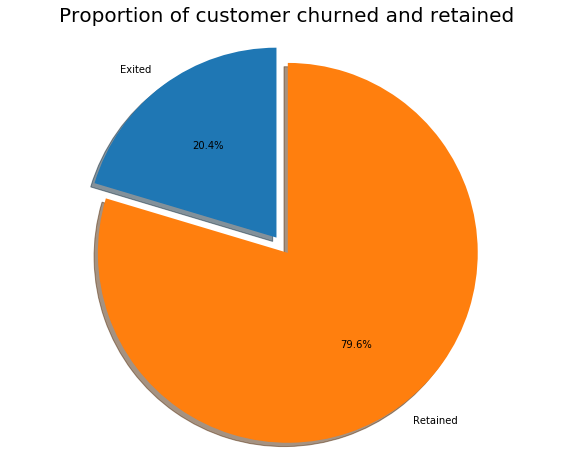

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.options.display.max_rows = None
pd.options.display.max_columns = None

labels = 'Exited', 'Retained'
sizes = [data.Exited[data['Exited']==1].count(), data.Exited[data['Exited']==0].count()]
explode = (0, 0.1)
fig1, ax1 = plt.subplots(figsize=(10, 8))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.title("Proportion of customer churned and retained", size = 20)
plt.show()

In [0]:
Approximately 20% of the customers have churned, model should also be able to predict the same.

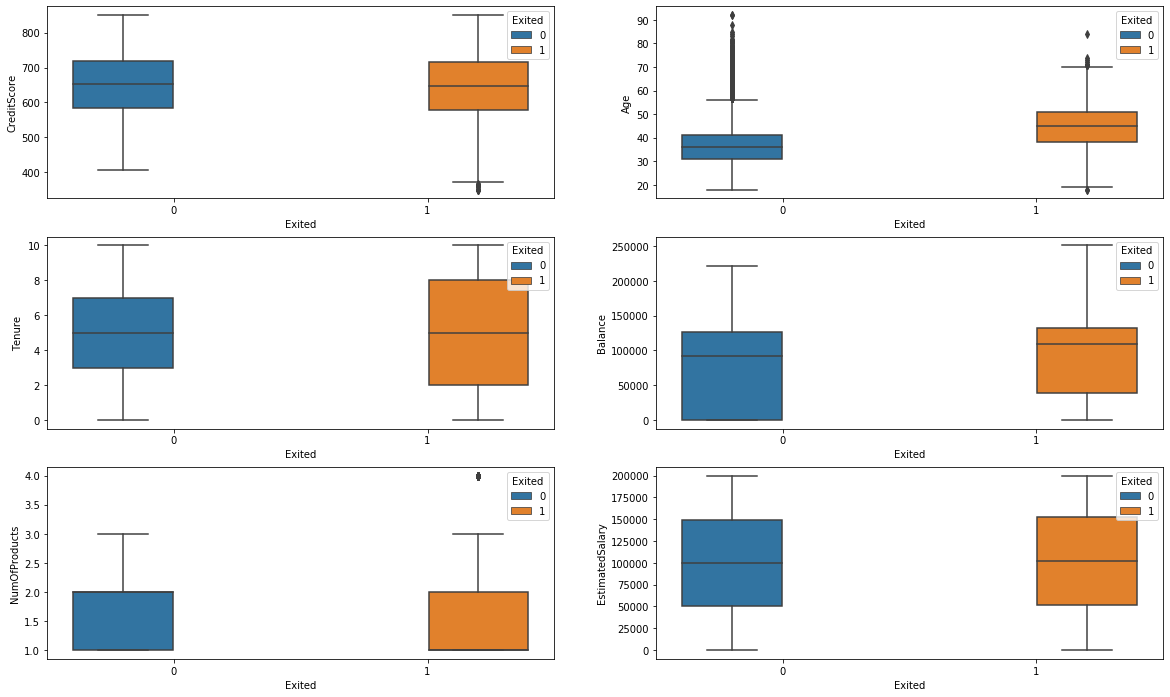

In [13]:
fig, axarr = plt.subplots(3, 2, figsize=(20, 12))
sns.boxplot(y='CreditScore',x = 'Exited', hue = 'Exited',data = data, ax=axarr[0][0])
sns.boxplot(y='Age',x = 'Exited', hue = 'Exited',data = data , ax=axarr[0][1])
sns.boxplot(y='Tenure',x = 'Exited', hue = 'Exited',data = data, ax=axarr[1][0])
sns.boxplot(y='Balance',x = 'Exited', hue = 'Exited',data = data, ax=axarr[1][1])
sns.boxplot(y='NumOfProducts',x = 'Exited', hue = 'Exited',data = data, ax=axarr[2][0])
sns.boxplot(y='EstimatedSalary',x = 'Exited', hue = 'Exited',data = data, ax=axarr[2][1])

In [0]:
# No big difference in the credit scores of customers who exited/retained.
# Customers above 40 yrs of age are the ones who mostly exited
# Most Exited ones have longer tenure
#No much difference in the balance of Exited and retained but what is to be noted here is, though the customer have exited there is some balance in the account.
# No of products and Estimated salary are not very helpful in differentiating between exited and retained.

(-1, 5)

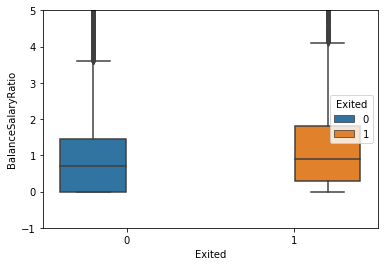

In [14]:
data['BalanceSalaryRatio'] = data.Balance/data.EstimatedSalary
sns.boxplot(y='BalanceSalaryRatio',x = 'Exited', hue = 'Exited',data = data)
plt.ylim(-1, 5)

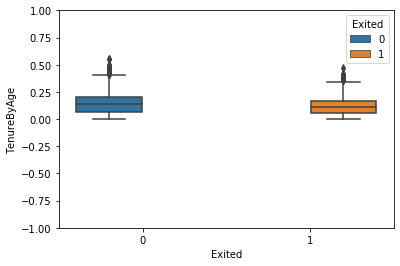

In [15]:
data['TenureByAge'] = data.Tenure/(data.Age)
sns.boxplot(y='TenureByAge',x = 'Exited', hue = 'Exited',data = data)
plt.ylim(-1, 1)
plt.show()

In [0]:
data['CreditScoreGivenAge'] = data.CreditScore/(data.Age)

In [0]:
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,BalanceSalaryRatio,TenureByAge,CreditScoreGivenAge
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,0.000000,0.047619,14.738095
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,0.744677,0.024390,14.829268
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1.401375,0.190476,11.952381
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0.000000,0.025641,17.923077
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,1.587055,0.046512,19.767442


In [17]:
continuous_vars = ['CreditScore',  'Age', 'Tenure', 'Balance','NumOfProducts', 'EstimatedSalary', 'BalanceSalaryRatio',
                   'TenureByAge','CreditScoreGivenAge']
cat_vars = ['HasCrCard', 'IsActiveMember','Geography', 'Gender']
data = data[['Exited'] + continuous_vars + cat_vars]
data.head()

,Exited,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,BalanceSalaryRatio,TenureByAge,CreditScoreGivenAge,HasCrCard,IsActiveMember,Geography,Gender
0,1,619,42,2,0.00,1,101348.88,0.000000,0.047619,14.738095,1,1,France,Female
1,0,608,41,1,83807.86,1,112542.58,0.744677,0.024390,14.829268,0,1,Spain,Female
2,1,502,42,8,159660.80,3,113931.57,1.401375,0.190476,11.952381,1,0,France,Female
3,0,699,39,1,0.00,2,93826.63,0.000000,0.025641,17.923077,0,0,France,Female
4,0,850,43,2,125510.82,1,79084.10,1.587055,0.046512,19.767442,1,1,Spain,Female


In [18]:
data.loc[data.HasCrCard == 0, 'HasCrCard'] = -1 #one Hot variables
data.loc[data.IsActiveMember == 0, 'IsActiveMember'] = -1
#data.loc[data.Exited== 0, 'Exited'] = -1
data.head()

,Exited,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,BalanceSalaryRatio,TenureByAge,CreditScoreGivenAge,HasCrCard,IsActiveMember,Geography,Gender
0,1,619,42,2,0.00,1,101348.88,0.000000,0.047619,14.738095,1,1,France,Female
1,0,608,41,1,83807.86,1,112542.58,0.744677,0.024390,14.829268,-1,1,Spain,Female
2,1,502,42,8,159660.80,3,113931.57,1.401375,0.190476,11.952381,1,-1,France,Female
3,0,699,39,1,0.00,2,93826.63,0.000000,0.025641,17.923077,-1,-1,France,Female
4,0,850,43,2,125510.82,1,79084.10,1.587055,0.046512,19.767442,1,1,Spain,Female


In [19]:
category= ['Geography', 'Gender'] #one hot encoding the categorical variables
remove = list()
for i in category:
    if (data[i].dtype == np.str or data[i].dtype == np.object):
        for j in data[i].unique():
            data[i+'_'+j] = np.where(data[i] == j,1,-1)
        remove.append(i)
data = data.drop(remove, axis=1)
data.head()

,Exited,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,BalanceSalaryRatio,TenureByAge,CreditScoreGivenAge,HasCrCard,IsActiveMember,Geography_France,Geography_Spain,Geography_Germany,Gender_Female,Gender_Male
0,1,619,42,2,0.00,1,101348.88,0.000000,0.047619,14.738095,1,1,1,-1,-1,1,-1
1,0,608,41,1,83807.86,1,112542.58,0.744677,0.024390,14.829268,-1,1,-1,1,-1,1,-1
2,1,502,42,8,159660.80,3,113931.57,1.401375,0.190476,11.952381,1,-1,1,-1,-1,1,-1
3,0,699,39,1,0.00,2,93826.63,0.000000,0.025641,17.923077,-1,-1,1,-1,-1,1,-1
4,0,850,43,2,125510.82,1,79084.10,1.587055,0.046512,19.767442,1,1,-1,1,-1,1,-1


In [20]:
minVec = data[continuous_vars].min().copy() #scaling the continuous variables
maxVec = data[continuous_vars].max().copy()
data[continuous_vars] = (data[continuous_vars]-minVec)/(maxVec-minVec)
data.head()

,Exited,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,BalanceSalaryRatio,TenureByAge,CreditScoreGivenAge,HasCrCard,IsActiveMember,Geography_France,Geography_Spain,Geography_Germany,Gender_Female,Gender_Male
0,1,0.538,0.324324,0.2,0.000000,0.000000,0.506735,0.000000,0.085714,0.235083,1,1,1,-1,-1,1,-1
1,0,0.516,0.310811,0.1,0.334031,0.000000,0.562709,0.000070,0.043902,0.237252,-1,1,-1,1,-1,1,-1
2,1,0.304,0.324324,0.8,0.636357,0.666667,0.569654,0.000132,0.342857,0.168807,1,-1,1,-1,-1,1,-1
3,0,0.698,0.283784,0.1,0.000000,0.333333,0.469120,0.000000,0.046154,0.310859,-1,-1,1,-1,-1,1,-1
4,0,1.000,0.337838,0.2,0.500246,0.000000,0.395400,0.000150,0.083721,0.354739,1,1,-1,1,-1,1,-1


In [0]:
from sklearn.model_selection import train_test_split
y = data['Exited']
X = data.drop('Exited',axis=1,inplace=True)
X_train, X_test, y_train, y_test = train_test_split(data,y, test_size=0.2)

In [0]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8000 entries, 9679 to 6606
Data columns (total 16 columns):
CreditScore            8000 non-null float64
Age                    8000 non-null float64
Tenure                 8000 non-null float64
Balance                8000 non-null float64
NumOfProducts          8000 non-null float64
EstimatedSalary        8000 non-null float64
BalanceSalaryRatio     8000 non-null float64
TenureByAge            8000 non-null float64
CreditScoreGivenAge    8000 non-null float64
HasCrCard              8000 non-null int64
IsActiveMember         8000 non-null int64
Geography_France       8000 non-null int64
Geography_Spain        8000 non-null int64
Geography_Germany      8000 non-null int64
Gender_Female          8000 non-null int64
Gender_Male            8000 non-null int64
dtypes: float64(9), int64(7)
memory usage: 1.0 MB


In [0]:
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(8000, 16) (8000,)
(2000, 16) (2000,)


In [0]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.activations import relu
from tensorflow.keras.layers import Flatten
import matplotlib.pyplot as plt

In [0]:
#num_classes = 2
#y_train = tf.keras.utils.to_categorical(y_train, num_classes)   # Converting the target into categorical which is stored as numeric
#y_test = tf.keras.utils.to_categorical(y_test, num_classes) 


In [23]:
y_train.shape

(8000,)

In [0]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from scipy.stats import uniform
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [0]:
logmodel = LogisticRegression()
logmodel.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
Predictions = logmodel.predict(X_test)

In [0]:
from sklearn.metrics import classification_report
print(classification_report(y_test,Predictions))

              precision    recall  f1-score   support

          -1       0.83      0.97      0.89      1590
           1       0.64      0.23      0.34       410

    accuracy                           0.82      2000
   macro avg       0.73      0.60      0.62      2000
weighted avg       0.79      0.82      0.78      2000



In [0]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, Predictions))

[[1537   53]
 [ 316   94]]


In [0]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='linear')
svclassifier.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [0]:
y_pred = svclassifier.predict(X_test)

In [0]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[1590    0]
 [ 410    0]]
              precision    recall  f1-score   support

          -1       0.80      1.00      0.89      1590
           1       0.00      0.00      0.00       410

    accuracy                           0.80      2000
   macro avg       0.40      0.50      0.44      2000
weighted avg       0.63      0.80      0.70      2000



In [0]:
import pandas as pd
print(pd.__version__)

0.25.3


In [0]:
import pandas as pd
import tensorflow as tf


In [0]:
X_train =np.array(X_train)
X_test=np.array(X_test)
y_train=np.array(y_train)
y_test=np.array(y_test)

In [39]:
model = Sequential()
num_classes = 2

model.add(Dense(8000, activation='relu',input_shape = X_train[0].shape))
model.add(Dense(num_classes, activation='sigmoid'))

for l in model.layers:
      print (l.name, l.input_shape,'==>',l.output_shape)
print()
print (model.summary())


dense_9 (None, 16) ==> (None, 8000)
dense_10 (None, 8000) ==> (None, 2)

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 8000)              136000    
_________________________________________________________________
dense_10 (Dense)             (None, 2)                 16002     
Total params: 152,002
Trainable params: 152,002
Non-trainable params: 0
_________________________________________________________________
None


In [0]:
batch_size = 8000
epochs = 20
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=.1, verbose=False)

model accuracy : 0.7815


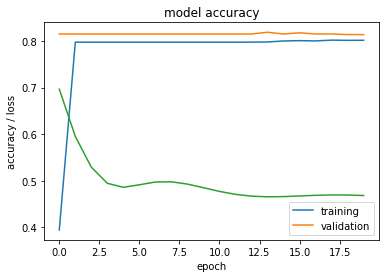

In [29]:
loss,accuracy  = model.evaluate(X_test, y_test, verbose=False)
print("model accuracy :" , accuracy)
#print("validation accuracy : ", val_accuracy)

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['loss'])
plt.title('model accuracy')
plt.ylabel('accuracy / loss')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')
plt.show()

In [40]:
model = Sequential()
num_classes = 2
model.add(Dense(8000, activation='relu',input_shape = X_train[0].shape))
model.add(Dense(num_classes, activation='sigmoid'))

for l in model.layers:
      print (l.name, l.input_shape,'==>',l.output_shape)
print()
print (model.summary())

dense_11 (None, 16) ==> (None, 8000)
dense_12 (None, 8000) ==> (None, 2)

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 8000)              136000    
_________________________________________________________________
dense_12 (Dense)             (None, 2)                 16002     
Total params: 152,002
Trainable params: 152,002
Non-trainable params: 0
_________________________________________________________________
None


In [33]:
batch_size = 4000
epochs = 20
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=.1, verbose=True)

Train on 7200 samples, validate on 800 samples
Epoch 1/20
7200/7200 [==============================] - 1s 136us/sample - loss: 0.4055 - accuracy: 0.8324 - val_loss: 0.3875 - val_accuracy: 0.8450
Epoch 2/20
7200/7200 [==============================] - 1s 87us/sample - loss: 0.4026 - accuracy: 0.8307 - val_loss: 0.3889 - val_accuracy: 0.8575
Epoch 3/20
7200/7200 [==============================] - 1s 85us/sample - loss: 0.4027 - accuracy: 0.8350 - val_loss: 0.3842 - val_accuracy: 0.8562
Epoch 4/20
7200/7200 [==============================] - 1s 87us/sample - loss: 0.3995 - accuracy: 0.8383 - val_loss: 0.3838 - val_accuracy: 0.8512
Epoch 5/20
7200/7200 [==============================] - 1s 87us/sample - loss: 0.3983 - accuracy: 0.8350 - val_loss: 0.3852 - val_accuracy: 0.8512
Epoch 6/20
7200/7200 [==============================] - 1s 92us/sample - loss: 0.3978 - accuracy: 0.8354 - val_loss: 0.3855 - val_accuracy: 0.8512
Epoch 7/20
7200/7200 [==============================] - 1s 87us/sample

model accuracy : 0.8325


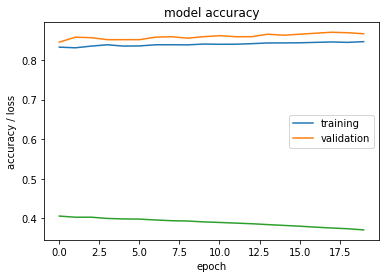

In [34]:
loss,accuracy  = model.evaluate(X_test, y_test, verbose=False)
print("model accuracy :" , accuracy)
#print("validation accuracy : ", val_accuracy)

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['loss'])
plt.title('model accuracy')
plt.ylabel('accuracy / loss')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')
plt.show()

In [36]:
model = Sequential()
num_classes = 2
input_shape = X_train[0].shape
model.add(Dense(8000, activation='relu',input_shape=X_train[0].shape))
model.add(Dense(num_classes, activation='sigmoid'))

for l in model.layers:
    print (l.name, l.input_shape,'==>',l.output_shape)
print()
print (model.summary())

dense_7 (None, 16) ==> (None, 8000)
dense_8 (None, 8000) ==> (None, 2)

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 8000)              136000    
_________________________________________________________________
dense_8 (Dense)              (None, 2)                 16002     
Total params: 152,002
Trainable params: 152,002
Non-trainable params: 0
_________________________________________________________________
None


In [37]:
batch_size = 2000
epochs = 20
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=.1, verbose=True)

Train on 7200 samples, validate on 800 samples
Epoch 1/20
7200/7200 [==============================] - 1s 145us/sample - loss: 0.5813 - accuracy: 0.7532 - val_loss: 0.4592 - val_accuracy: 0.8150
Epoch 2/20
7200/7200 [==============================] - 1s 93us/sample - loss: 0.4905 - accuracy: 0.7975 - val_loss: 0.4574 - val_accuracy: 0.8150
Epoch 3/20
7200/7200 [==============================] - 1s 94us/sample - loss: 0.4826 - accuracy: 0.7975 - val_loss: 0.4393 - val_accuracy: 0.8150
Epoch 4/20
7200/7200 [==============================] - 1s 93us/sample - loss: 0.4680 - accuracy: 0.7982 - val_loss: 0.4474 - val_accuracy: 0.8163
Epoch 5/20
7200/7200 [==============================] - 1s 93us/sample - loss: 0.4695 - accuracy: 0.7983 - val_loss: 0.4461 - val_accuracy: 0.8175
Epoch 6/20
7200/7200 [==============================] - 1s 93us/sample - loss: 0.4640 - accuracy: 0.8025 - val_loss: 0.4383 - val_accuracy: 0.8188
Epoch 7/20
7200/7200 [==============================] - 1s 96us/sample

model accuracy : 0.8105


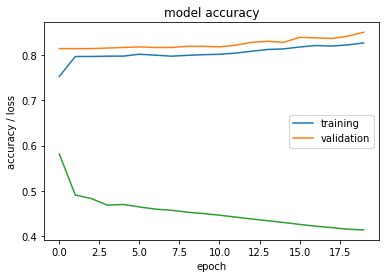

In [38]:
loss,accuracy  = model.evaluate(X_test, y_test, verbose=False)
print("model accuracy :" , accuracy)
#print("validation accuracy : ", val_accuracy)

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['loss'])
plt.title('model accuracy')
plt.ylabel('accuracy / loss')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')
plt.show()